# Classification Exercise

In this section, we will learn how to implement a classifier that can predict if a new customer will likely default on his credit card payment. This is a *supervised* machine learning task as we try to learn a function that maps customer characteristics to credit default behavior.

## Step 1: Import Libraries

In [1]:
%matplotlib notebook

import numpy as np

from pandas import read_csv
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.cross_validation import train_test_split, StratifiedKFold

import matplotlib.pyplot as plt

print "Libraries imported successfully!"

Libraries imported successfully!


## Step 2: Load the Data

The dataset which we will be using for this section describes the credit defaulting behavior for our existing customers. Load this data using *pandas'* `read_csv(file_path, index_col=0)` function and assign the result to a new variable `df`. In that statement, replace `file_path` with the file path for the *Default.csv* file on your computer, e.g., *"data/Default.csv"*:

In [3]:
# Load the data into Python
from pandas import read_csv
df = read_csv("data/Default.csv", index_col=0)


Python's pandas library provides powerful functionalities to load data from different sources, including *CSV files*, *Excel files*, and various *database systems*. Once loaded, the data is represented as a `DataFrame`. You can think of a `DataFrame` as an Excel spreadsheet or an SQL table.

[Help: Reading Data From Different Sources](http://pandas.pydata.org/pandas-docs/stable/io.html)

We can use *pandas'* `head()` command to look at the first few rows of the data we loaded just now. Type `df.head()` into the following cell:

In [10]:
# Display first few rows of our dataset
df.head(20)

,student,balance,income,default
1,0,729.526495,44361.625070,0
2,1,817.180407,12106.134700,0
3,0,1073.549164,31767.138950,0
4,0,529.250605,35704.493940,0
5,0,785.655883,38463.495880,0
6,1,919.588530,7491.558572,0
7,0,825.513330,24905.226580,0
8,1,808.667504,17600.451340,0
9,0,1161.057854,37468.529290,0
10,0,0.000000,29275.268290,0


**Bonus Question**: How do we display all entries with a balance of less than 500? (Hint: df.query("column_name < value") applies a filter to our dataset)

In addition, it is always a good idea to test the dimensionality of the imported data using the `shape` command. This is important to make sure you have really imported all the data and imported it in the correct way. The `shape` command produces two values; the first is the number of rows, the is second the number of columns.

Enter `df.shape` into the following cell to see if the data was loaded correctly:

In [4]:
# Check dimensionality
df.shape

(10000, 4)

## Step 3: Data Preprocessing

### Replace Text

Before we can construct our classification model, we need to do a little bit of *data preprocessing*. We can see that the *student* and *default* attributes in our dataset hold text instead of numeric values. This can be problematic for Python and scikit-learn. Fortunately, we can use `df.replace(old_value, new_value)` to easily replace values in our dataset.

Using `df.replace(old_value, new_value)`, replace all occurrences of *"Yes"* with the value *1* and all *"No"* occurrences with *0*:

In [6]:
# Convert strings to numerical values and reassign to 'df' variable

df= df.replace("Yes",1)
df= df.replace("No",0)

**Bonus Question**: How do we check if the String values have been replaced?

### Split the Dataset Into Training & Test Subsets

In order to evaluate classification performance later on, we want to split our dataset into random training and test subsets. This means that we reserve a few rows in the dataset for evaluation/testing (10% in this case) and use the remaining rows to train our classifier.

Fortunately, *scikit-learn* provides a `train_test_split(data_frame, test_size=0.1)` function which does this for us. It returns two subsets of our data; the first is the training subset and the second is the test subset.

In [35]:
# Use train_test_split to create training and test sets and assign to variables df_train and df_test
from sklearn.cross_validation import train_test_split

##create training and test sets
df_train, df_test = train_test_split(df, test_size=0.1)
## if you want to see print it out to see the training data 
df_train.head()
print len(df_train[df_train.default==1])
print len(df_train[df_train.default==0])
print len(df_test[df_test.default==1])

## above the testing set how many have defaulted the length 

#if i want know the length of test 
print len(df_test)

306
8694
27
1000


**Bonus Question**: How do we display the number of samples in the training and test subsets?

[Help: Split Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

We also need to separate the data into features (input variables) and target (output variable). We want to predict the target column using the feature columns. 

In this section, we will use the *student*, *balance*, and *income* attributes to predict the *default* column. Let's define the names of the *feature columns as a list* and *create new variables* for the feature and target data:

In [18]:
# Define feature columns "student", "balance", and "income" as a list
feature_cols = ["student", "balance", "income"]

# Define training feature and target values
X_train =  df_train[feature_cols]
Y_train = df_train.default

## splitting into output and input  y train is output x train is input similar to R progarmming 

## define test data set into features (X) and target(Y)
##X test is input and y test is output  these 3 columns i want train on and the 4th one is the testing set
X_test=df_test[feature_cols]
Y_test = df_test.default

## Step 4: Train Classifier

The data is in the right format now and we can construct our classifier using the training subset. We pass both the feature (`X_train`) and the target (`Y_train`) *training* values to the classifier. We say that the classifier will try to *learn a relationship* between the two.

In this section, we will use the Gaussian Naive Bayes classifier provided by the scikit-learn library. Naive Bayes classification is simple, yet produces very accurate results on many datasets.

Let's train the classifier using the data in our training subsets `X_train` and `Y_train`. Create a classification object with `GaussianNB()` and assign it to a variable called `gnb`. Afterwards, you can learn the model coefficients by calling the `fit` command on the classification object. The `fit` command requires two parameters: `X_train` and `Y_train`. Run the code in the following cell to execute training:

In [37]:
# Train classifier
gnb = GaussianNB()
clf = gnb.fit(X_train, Y_train)
print "Training done!"
print clf
print gnb

Training done!
GaussianNB()
GaussianNB()


[Help: Naive Bayes Classifier](http://scikit-learn.org/stable/modules/naive_bayes.html)

## Step 5: Test Classifier

We can now use the classifier's `predict` command to predict the values for the testing subset. Afterwards, we will compare the predicted classes with the actual classes in our dataset. Note that we only pass the features (`X_test`) and not the labels to the `predict` command.

Enter `clf.predict(X_test)` into the following cell and assign the results to a new variable called `Y_pred`:

In [20]:
# Test classifier

## it shows what data set that will default or not default what model ran all of those 
## higher probability 
print "Testing Classifier"
Y_pred = clf.predict(X_test)
print Y_pred

Testing Classifier
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

## Step 6: Evaluate Accuracy
One of the most important parts of data science includes assessing the accuracy of our results. There are several methods that we can use to understand the performance of our classifier.

### Calculate Plain Accuracy

One of the simplest ways to evaluate our classifier is to count the *number of misclassifications* in our test set.

Execute the code in the following cell to display the *number of misclassifications*:

In [21]:
print "Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != Y_pred).sum())

Number of mislabeled points out of a total 1000 points : 27


**Bonus Question**: How do we change the code above to display the number of *correct* classifications?

### Display Confusion Matrix

The *confusion matrix* visualizes the performance of our classifier in more detail. Each *column* of the matrix represents the instances in a *predicted* class while each *row* represents the instances in an *actual* class.

Use the `confusion_matrix(actual_classes, predicted_classes)` command to display the confusion matrix:

In [25]:
# Display confusion matrix
print confusion_matrix(Y_test, Y_pred)

[[967   5]
 [ 22   6]]


[Help: Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

### Compute Frequencies

From the confusion matrix above, we can see that the classes are not *balanced* in the test set. We should always investigate the distribution of the target classes/labels. *numpy's* `np.bincount(labels)` command does this for us:

In [26]:
print np.bincount(Y_test)

[972  28]


We can also easily generate a barplot to illustrate this result. This becomes particularly helpful when working with a larger number of classes.

Execute the following code to create the bar plot:

<IPython.core.display.Javascript object>


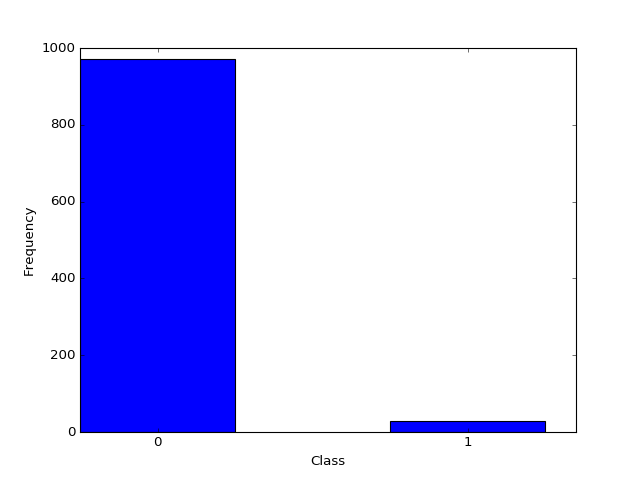

In [27]:
barwidth = 0.5
index = np.arange(len(np.unique(Y_test)))
plt.figure()
plt.bar(index, np.bincount(Y_test), barwidth)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(index + 0.5 * barwidth, ('0', '1'))
plt.show()

### Generate Classification Report

*Scikit-learn* provides the convenient `classification_report(actual_classes, predicted_classes)` command which displays a more detailed text report of our classifier's performance:

In [28]:
print classification_report(Y_test, Y_pred)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       972
          1       0.55      0.21      0.31        28

avg / total       0.97      0.97      0.97      1000



[Help: Generate Classification Report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

### Plot Receiver Operating Characteristic

*Receiver Operating Characteristic (ROC)* is a plot of a binary (two-class) classifier with *false positive rate* on the x-axis against *true positive rate* on the y-axis. A ROC plot depicts relative trade-offs that a classifier makes between benefits (true positives) and costs (false positives). This plot also decouples classifier performance from the conditions under which the classifiers will be used. 

When a single number is needed to summarize classification performance, we can use the *Area under the ROC curve (AUC)* measure.

Execute the following code to plot the ROC curve and AUC value for our classifier:

<IPython.core.display.Javascript object>


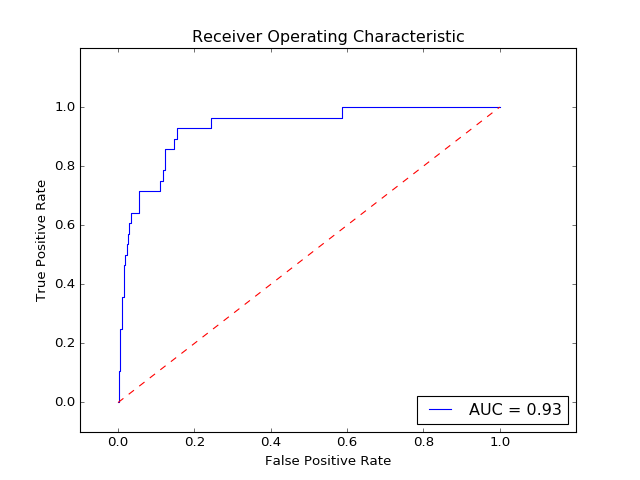

In [38]:
# Get sample scores for ROC curve
Y_score = clf.predict_proba(X_test)

# Compute ROC metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_score[:, 1], pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Compare Classification Accuracy Over Cross Validation

In order to obtain a better estimate of classification error rates, we employ cross validation and plot the ROC curves for each fold:

<IPython.core.display.Javascript object>


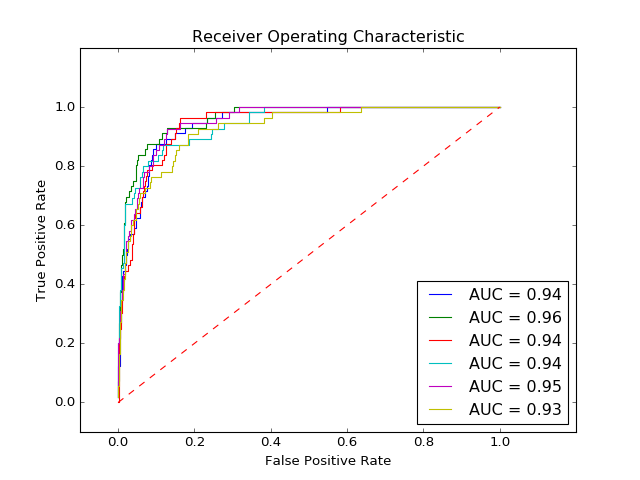

In [39]:
# Configure cross validation
cv = StratifiedKFold(df.default, n_folds=6)

# Create new plot
plt.figure()

# Get indices for training and test subsets for each fold
for i, (train, test) in enumerate(cv):
    
    # Get training data
    X_train = df[feature_cols].as_matrix()[train, :]
    Y_train = df.default.as_matrix()[train,]
    
    # Get test data
    X_test = df[feature_cols].as_matrix()[test, :]
    Y_test = df.default.as_matrix()[test,]
    
    # Configure classifier
    clf = GaussianNB()
    
    # Learn classification model
    clf.fit(X_train, Y_train)
    
    # Get sample scores for ROC curve
    Y_score = clf.predict_proba(X_test)
    
    # Compute ROC metrics
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_score[:, 1], pos_label=1)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Plot ROC curve
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[Help: Cross Validation](https://www.cs.cmu.edu/~schneide/tut5/node42.html)  
[Help: ROC Curve With Cross Validation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#example-model-selection-plot-roc-crossval-py)